# Introduction:

- This data shows the mass shooting in america for the past 51 years
- There has been

In [4]:
#Load libraries
library(ggplot2)
library(ggmap)
library(stringr)
library(plyr)
library(lubridate)


Attaching package: ‘lubridate’

The following object is masked from ‘package:plyr’:

    here

The following object is masked from ‘package:base’:

    date



Data mass shooting in the United states since 1966 to 2017.

https://www.kaggle.com/zusmani/us-mass-shootings-last-50-years/downloads/Mass%20Shootings%20Dataset%20Ver%202.csv

In [23]:
#Load data
mass <- read.csv("https://storage.googleapis.com/kaggle-datasets/2778/4884/Mass%20Shootings%20Dataset%20Ver%202.csv?GoogleAccessId=datasets@kaggle-161607.iam.gserviceaccount.com&Expires=1509481309&Signature=WYQ%2BCa%2B1FIggTc2Kx%2Bu5M%2BxF7PGNdKJ0vHxYn1vN6cnJZ751hiaQhRwtz5NVCwrvd56XYOocyqXlSTwuJcLTzglwxC8MXFqS0dofvVjqMhtINRobRi5P0ZS%2BlxXM%2FESA8ixIS7f0hV6NYRUTeMmuMS29QC4QxYm1V0wtZPMznrJa%2FNYPQFeSec0PhdcLsu1ATqwrmgWMUaTjOnv38qhImpdDnx9BzHC47z%2BWsTXgflDneFTLHA01QSbPsv41fDvTE041EaqnVLdhN1piUHyREjVXiIohOc%2B226%2BmO5Dlnt0pLtriGHlfwqKKmwH%2F72YgyRAPoVGjs9CYGRAPm%2BO0aw%3D%3D", header = TRUE)

In [24]:
#fix dates
mass$Date <- as.Date(paste(mass$Date), "%m/%d/%Y")

In [25]:
head(mass)

S.,Title,Location,Date,Summary,Fatalities,Injured,Total.victims,Mental.Health.Issues,Race,Gender,Latitude,Longitude
1,Las Vegas Strip mass shooting,"Las Vegas, NV",2017-10-01,,58,527,585,Unclear,White,M,36.18127,-115.1341
2,San Francisco UPS shooting,"San Francisco, CA",2017-06-14,"Jimmy Lam, 38, fatally shot three coworkers and wounded two others inside a UPS facility in San Francisco. Lam killed himself as law enforcement officers responded to the scene.",3,2,5,Yes,Asian,M,NA,NA
3,Pennsylvania supermarket shooting,"Tunkhannock, PA",2017-06-07,"Randy Stair, a 24-year-old worker at Weis grocery fatally shot three of his fellow employees. He reportedly fired 59 rounds with a pair of shotguns before turning the gun on himself as another co-worker fled the scene for help and law enforcement responded.",3,0,3,Unclear,White,M,NA,NA
4,Florida awning manufacturer shooting,"Orlando, Florida",2017-06-05,"John Robert Neumann, Jr., 45, a former employee of manufacturer Fiamma Inc. fatally shot five workers at the company, and then killed himself on the scene. He'd been fired from the company in April. The attack took place a week before the one-year anniversary of the Orlando nightclub massacre.",5,0,5,Unclear,,M,NA,NA
5,Rural Ohio nursing home shooting,"Kirkersville, Ohio",2017-05-12,"Thomas Hartless, 43, shot and killed a former girlfriend and another employee of a nursing home, and then fatally shot the Kirkersville police chief responding to the scene. Hartless' former girlfriend had recently obtained a court protection order against Hartless. Investigators later found more than 60 firearms in the home of Hartless, who was also found dead at the scene of the attack.",3,0,3,Yes,White,M,NA,NA
6,Fresno downtown shooting,"Fresno, California",2017-04-18,"Kori Ali Muhammad, 39, opened fire along a street in downtown Fresno, killing three people randomly in an alleged hate crime prior to being apprehended by police. Muhammad, who is black, killed three white victims and later described his attack as being racially motivated; he also reportedly yelled 'Allahu Akbar' at the time he was arrested, but authorities indicated they found no links to Islamist terrorism.",3,0,3,Unclear,Black,M,NA,NA


# Sex of the Perpetrator

Firstly, who are most likely to commit mass murder?

In [27]:
Gender <- factor(mass$Gender)

In [28]:
Gender <- fct_collapse(Gender,
                  "Male"=c("M","Male"),
                  "Male/Female"=c("M/F","Male/Female"),
                  "Unknown"="Unknown",
                  "Female"="Female")

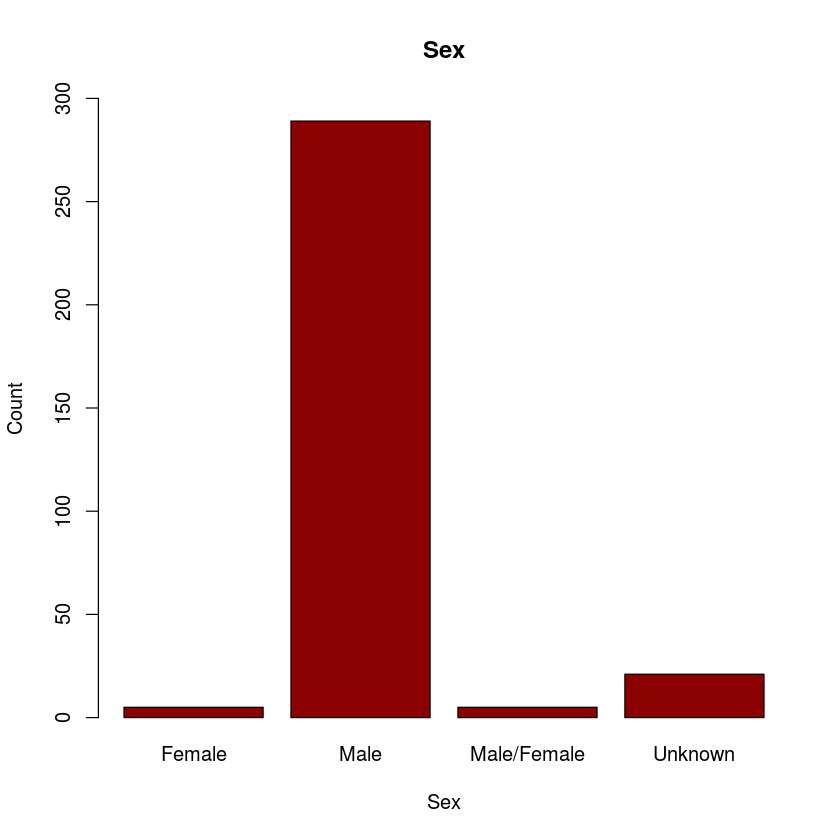

In [29]:
plot(Gender,
     main = "Sex",
    ylab = "Count",
    xlab = "Sex",
    col = "dark red",
    ylim = c(0,300))

This plot shows that males are the most likely to commit mass murder.

# Incident Of Mass shooting based on Dates

Next, we will look at the relationship between the dates and days that mass murders are carried out on. Therefore, is there an increase in the number of mass shooting over the past 50 years. Looking at the number each. Secondly, we will look at whether there is a significant relationship between the months that mass shooting is likely to occur and finally the day of the month.

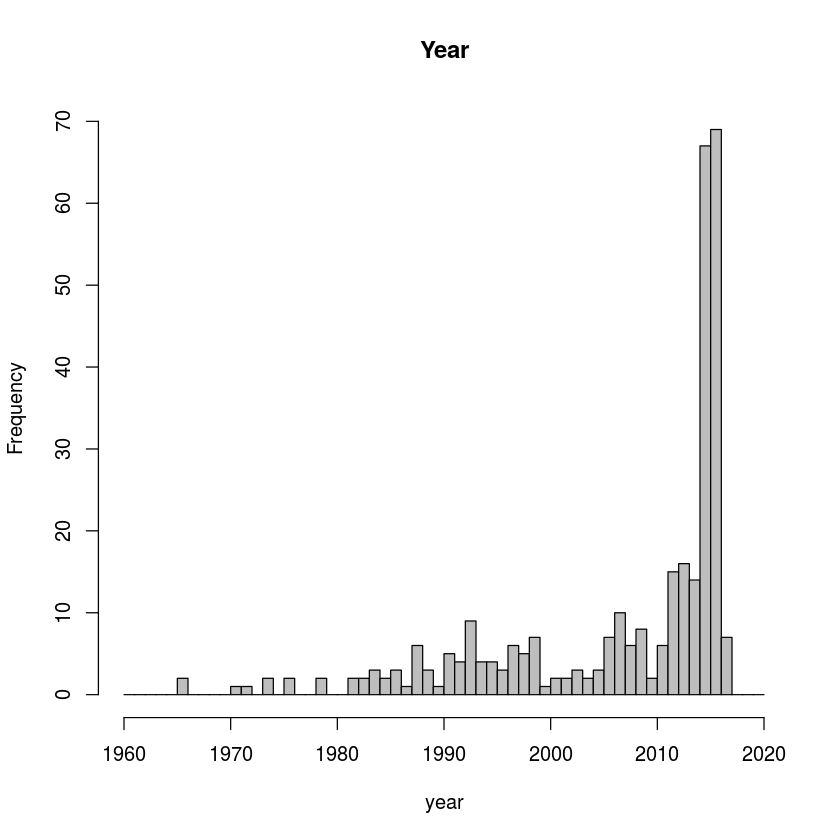

In [73]:
year <- str_sub(mass$Date,1, 4)
year <- as.numeric(year)
years <- c(1960:2020)
hist(year, 
     col = "grey", 
     main = "Year",
     ylim = c(0, 70),
     breaks = years)

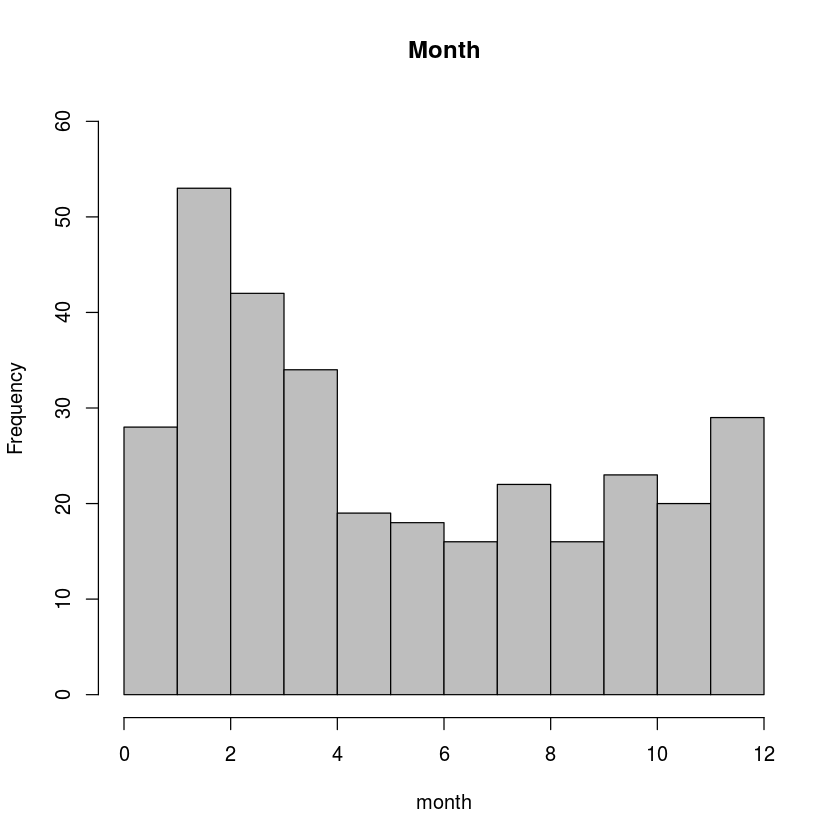

In [74]:
#Month
month <- str_sub(mass$Date, 6, 7)
month <- as.numeric(month)
months <- c(0:12)
hist(month, 
     col = "grey", 
     main = "Month",
     ylim = c(0, 60),
     breaks=months)

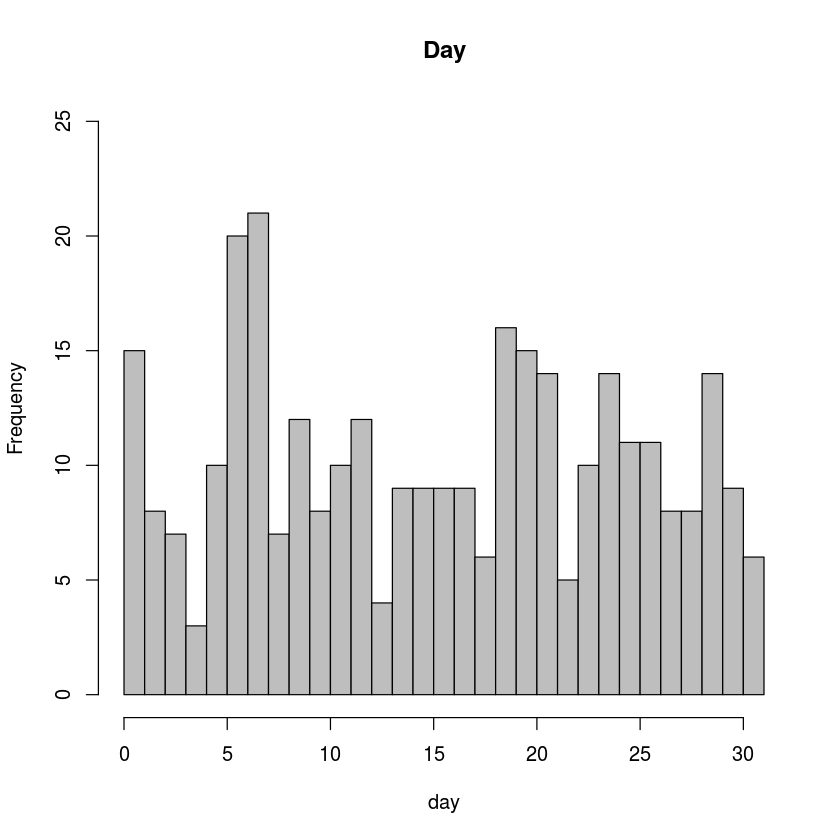

In [78]:
#Day
day <- str_sub(mass$Date,9,10)
day <- as.numeric(day)
days <- c(0:31)
hist(day, 
     col = "grey", 
     main = "Day", 
     ylim = c(0, 25),
     breaks=days)

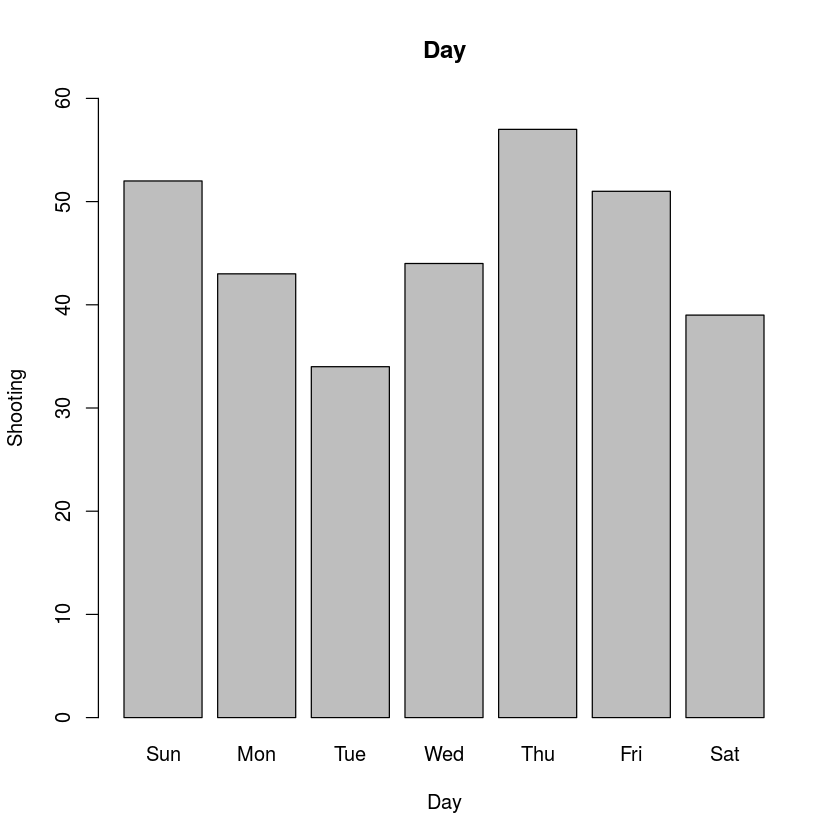

In [6]:
#Day of the week
weekday <- as.Date(betterDates)
freqs <- aggregate(weekday ~ wday, FUN=length)
barplot(freqs$weekday,
        main = "Day",
        ylab = "Shooting", 
        xlab = "Day",
        ylim=c(0,60),
        names.arg = c("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"))

- These four histograms show that mass shooting in the USA has increased since 1966. With 2015 and 2016 having the most shooting in the past 50 years. However, it would appear that this is an incomplete dataset as this dataset reports 7 mass shooting this year. However, there has been 270 in 2017 so far. (https://www.massshootingtracker.org/data)
- The next histogram looks at each month from this it would appear that February followed by March have had the most mass shooting in the past 51 years. Although, it would appear that there is less shooting in the summer months. 
- This histogram shows that there is no particular day that mass shooting is likely to occur. 
- The final barplot looks at what day of the week mass shooting in America are most likely to occur. Thursday seems to have the most mass shooting. Whereas, Tuesdays seems to have the least number of incident.
- In summary, this data would suggest that mass shooting are likely to increase in the future and February and March seem to be the most common months for the mass shooting to occur. Unfortunately, it would not appear that any particular day of the month is most common for a mass shooting. However, when looking at the day of the week it would appear that Thursday, Friday and Sunday are the most common days for a mass shooting to take place.

# Location off Mass Shooting

Next we will look at the location where mass shooting are have occured in the past. Are some states more likely to have mass shooting?

In [5]:
library(ggmap)

In [24]:
#longitude and latitude to new data frame
lon <- mass$Longitude
lat <- mass$Latitude
co <- as.data.frame(cbind(lat,lon))

In [25]:
#Remove N/A from the data frame
co <- na.omit(co)

In [32]:
x <- revgeocode(c(146.4625, -36.05556), output = 'all')

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=37.225076,-94.429539&zoom=3&size=640x640&scale=2&maptype=satellite&language=en-EN&sensor=false
Warning message:
“Removed 2 rows containing missing values (geom_point).”

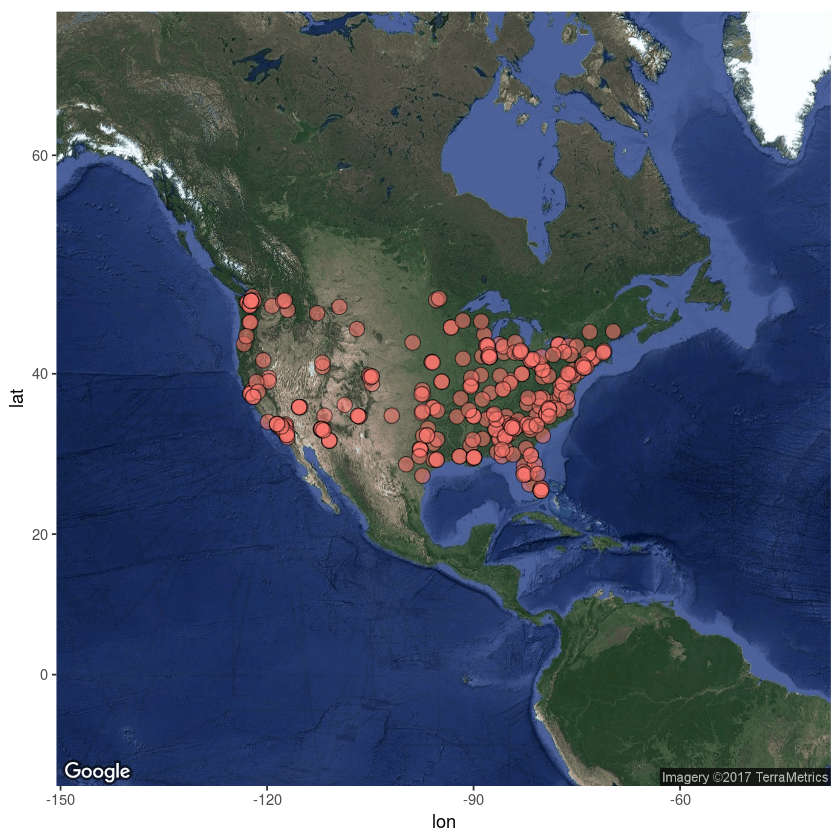

In [88]:
#Download googlemap 
shooting_map <- get_map(location = c(lon = mean(co$lon), lat = mean(co$lat)), zoom = 3,
                      maptype = "satellite", scale = 2)

#Plot the longitude and latitude on the map
ggmap(shooting_map) +
  geom_point(data = co, aes(x = lon, y = lat, fill = "red", alpha = 0.8), size = 4, shape = 21) +
  guides(fill=FALSE, alpha=FALSE, size=FALSE, na.rm = TRUE)

# Limitation

- One of the limitations of this dataset is there is a substantial amount of data missing. This website (https://www.massshootingtracker.org/data) that tracks shooting in America states that there has been over 1800 mass shooting since 2013. Whereas, this dataset used only accounts for 387 mass shooting over the 51 years.

# Conclusion

In conclusion, This data demonstrates a vast problem with gun violence in America. one of the issues with this data set is not all mass shooting have been account for 